# RH50 vs RH98
Here we will plot the 98th percentile of relative height against the 50th percentile with a color gradient showing the density of data points using gaussian_kde.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import h5py
from scipy.stats import gaussian_kde
from mpl_scatter_density import ScatterDensityArtist

In [2]:
def h5_to_dict(group):
    """
    Recursively converts an h5 group into a dictionary of numpy arrays.
    """
    data_dict = {}
    for key in group:
        item = group[key]
        if isinstance(item, h5py.Group):
            data_dict[key] = h5_to_dict(item)  # Recursively handle nested groups
        else:
            data_dict[key] = item[:]  # Convert dataset to numpy array
    return data_dict

def find_rh_data(data_dict):
    """
    Recursively searches for 'rh' key in the dictionary.
    Returns the 'rh' data if found, otherwise None.
    """
    for key, value in data_dict.items():
        if key == "rh":
            print("Found the 'rh' key in the data dictionary")
            return value
        elif isinstance(value, dict):
            result = find_rh_data(value)
            if result is not None:
                return result
    return None

# def plot_rh_data(rh_data):
#     """
#     Plots the 98th percentile against the 50th percentile of the 'rh' data
#     with a color gradient showing the density of data points using gaussian_kde.
#     """
#     if len(rh_data.shape) == 2 and rh_data.shape[1] > 98:
#         rh_50th = rh_data[:, 49]  # Assuming 0-based indexing
#         rh_98th = rh_data[:, 97]  # Assuming 0-based indexing
# 
#         # Perform a Gaussian kernel density estimate
#         xy = np.vstack([rh_50th, rh_98th])
#         z = gaussian_kde(xy)(xy)
# 
#         # Sort the points by density, so that the densest points are plotted last
#         idx = z.argsort()
#         x, y, z = rh_50th[idx], rh_98th[idx], z[idx]
# 
#         # Plot the data
#         plt.figure(figsize=(10, 6))
#         plt.scatter(x, y, c=z, s=50)
#         plt.colorbar(label='Density')
#         plt.xlabel('RH50')
#         plt.ylabel('RH98')
#         plt.title('RH50 vs RH98 with Density by SciPy Gaussian KDE')
#         plt.show()
#     else:
#         print("The 'rh' data does not contain the required percentiles.")

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def plot_rh_data(rh_data):
    """
    Plots the 98th percentile against the 50th percentile of the 'rh' data
    with a density gradient using mpl-scatter-density.
    """
    if len(rh_data.shape) == 2 and rh_data.shape[1] > 98:
        rh_50th = rh_data[:, 49]  # Assuming 0-based indexing
        rh_98th = rh_data[:, 97]  # Assuming 0-based indexing

        # Create the density scatter plot
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
        density = ax.scatter_density(rh_50th, rh_98th, cmap=white_viridis)
        fig.colorbar(density, label='Density')

        # Set labels and title
        ax.set_xlabel('RH50')
        ax.set_ylabel('RH98')
        ax.set_title('RH50 vs RH98')
        plt.show()
    else:
        print("The 'rh' data does not contain the required percentiles.")

In [3]:
# Path to your .h5 file
# file_path = 'GEDI_sample_files/GEDI02_A_2021050140102_O12405_02_T10912_02_003_02_V002.h5'
file_path = 'GEDI_sample_files/GEDI02_A_2021086153349_O12964_03_T08275_02_003_02_V002.h5'
# Open the .h5 file in read mode and convert it to a dictionary
with h5py.File(file_path, 'r') as h5_file:
    data_dict = {}
    for group_name in h5_file:
        print("Converting group:", group_name)
        group = h5_file[group_name]
        data_dict[group_name] = h5_to_dict(group)
print("Done converting the .h5 file to a dictionary.")

Converting group: BEAM0000
Converting group: BEAM0001
Converting group: BEAM0010
Converting group: BEAM0011
Converting group: BEAM0101
Converting group: BEAM0110
Converting group: BEAM1000
Converting group: BEAM1011
Converting group: METADATA
Done converting the .h5 file to a dictionary.


Found the 'rh' key in the data dictionary


C:\Users\jingb\.conda\envs\GEDI\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
C:\Users\jingb\.conda\envs\GEDI\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


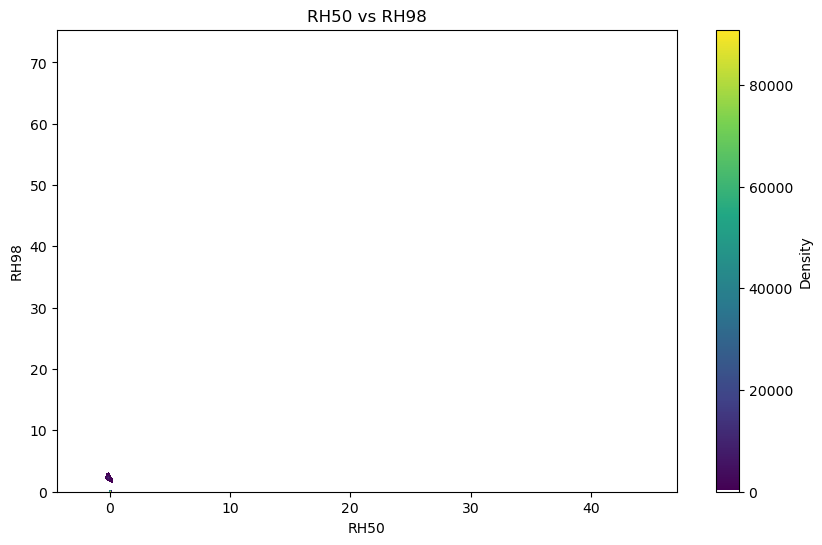

In [4]:
# Find and plot the 'rh' data
rh_data = find_rh_data(data_dict)
if rh_data is not None:
    plot_rh_data(rh_data)
else:
    print("The 'rh' key does not exist in the data dictionary.")

In [ ]:
# Fake data for testing
x = np.random.normal(size=100000)
y = x * 3 + np.random.normal(size=100000)



 # Create the density scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(x, y, cmap=white_viridis)
fig.colorbar(density, label='Density')

# Set labels and title
ax.set_xlabel('RH50')
ax.set_ylabel('RH98')
ax.set_title('RH50 vs RH98')
plt.show()